In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [9]:
base = open(r"C:\Users\santi\OneDrive\Documentos\GitHub\Hospitals-Access-Peru\data\IPRESS.csv", 'rb').read()
det = chardet.detect(base)
charenc = det['encoding']
charenc

'MacRoman'

In [40]:
csv_data = pd.read_csv(r"C:\Users\santi\OneDrive\Documentos\GitHub\Hospitals-Access-Peru\data\IPRESS.csv", encoding = charenc)
csv_new = csv_data.rename(columns={
    'InstituciÛn': 'Institución',
    'ClasificaciÛn': 'Clasificación',
    'CÛdigo ⁄nico': 'Código Único',
    'CondiciÛn': 'Condición'
})
csv_new.head(5)

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,DirecciÛn,...,Inicio de Actividad,Director MÈdico y/o Responsable de la AtenciÛn de Salud,Estado,SituaciÛn,Condición,InspecciÛn,NORTE,ESTE,COTA,CAMAS
0,PRIVADO,16618,SONRIE MAS,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,SANTIAGO DE SURCO,150140,"AV. CAMINOS DEL INCA 2028 OF.201, URBANIZACION...",...,11/03/2013,GILBERTO MARTIN AQUIJE GAVILAN,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
1,GOBIERNO REGIONAL,7050,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,SANTA CRUZ,60611,COMUNIDAD DE AMBATO,...,29/06/2006,IDELSO MENOR CHAVEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-78.858380,-6.133523,1724.0,NaN
2,GOBIERNO REGIONAL,99,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,LORETO,PARINARI,160302,ACTUALIZAR,...,01/01/1900,JULIO TONY CAITIMARI MACHOA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.258139,-4.581509,124.0,NaN
3,PRIVADO,19555,DENTOCAPLINA,CONSULTORIOS MEDICOS Y DE OTROS PROFESIONALES ...,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,TACNA,TACNA,TACNA,230101,AV.LEGUIA 1892,...,30/12/2014,BYANCA LISSETTE ARANDA LANCHIPA,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN
4,OTRO,18792,MEDICO DE FAMILIA MANTARA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,JUNIN,TARMA,TARMA,120701,JR. ROSA ZAPATEL S/N - BARRIO MANTARA - TARMA,...,06/07/2014,LILIAN DENISE ADAUTO DE LA CRUZ,ACTIVADO,,EN FUNCIONAMIENTO,,NaN,NaN,NaN,NaN


In [41]:
data = csv_new.loc[csv_new['Estado'] == 'ACTIVADO'].dropna(subset=['NORTE', 'ESTE'])
data

,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,UBIGEO,DirecciÛn,...,Inicio de Actividad,Director MÈdico y/o Responsable de la AtenciÛn de Salud,Estado,SituaciÛn,Condición,InspecciÛn,NORTE,ESTE,COTA,CAMAS
1,GOBIERNO REGIONAL,7050,AMBATO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,CAJAMARCA,CUTERVO,SANTA CRUZ,60611,COMUNIDAD DE AMBATO,...,29/06/2006,IDELSO MENOR CHAVEZ,ACTIVADO,,EN FUNCIONAMIENTO,,-78.858380,-6.133523,1724.0,NaN
2,GOBIERNO REGIONAL,99,SANTA ISABEL DE YUMBATURO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LORETO,LORETO,PARINARI,160302,ACTUALIZAR,...,01/01/1900,JULIO TONY CAITIMARI MACHOA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.258139,-4.581509,124.0,NaN
6,MINSA,7278,PUESTO DE SALUD HEROES DEL CENEPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,LIMA,VILLA EL SALVADOR,150142,"JR. HEROES DEL CENEPA MZ C LT 20, ALT DE PANAM...",...,01/02/2008,BASTIDAS CAMARENA HUBERT ALEX . .,ACTIVADO,,EN FUNCIONAMIENTO,,-76.930608,-12.248699,NaN,NaN
12,GOBIERNO REGIONAL,5460,NUEVA BETANIA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,UCAYALI,CORONEL PORTILLO,CALLERIA,250101,OTROS CC.NN. NUEVA BETANIA S/N N⁄MERO S/N DIST...,...,20/12/2000,MARIANA VASQUEZ PINEDO,ACTIVADO,,EN FUNCIONAMIENTO,,-74.296531,-8.398366,177.0,NaN
15,GOBIERNO REGIONAL,6431,PONGO ISLA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,SAN MARTIN,SAN MARTIN,HUIMBAYOC,220907,OTROS CP PONGO ISLA DISTRITO HUIMBAYOC PROVINC...,...,14/09/2001,MIRLANDA MOZOMBITE BARDALES,ACTIVADO,,EN FUNCIONAMIENTO,,-75.885812,-6.438298,172.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20814,GOBIERNO REGIONAL,2283,P.S NUEVO HUALAPAMPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,HUANCABAMBA,HUARMACA,200304,CENTRO POBLADO NUEVO HUALAPAMPA S/N,...,01/01/1900,NaN,ACTIVADO,,EN FUNCIONAMIENTO,,-79.437187,-5.789407,1364.0,NaN
20815,GOBIERNO REGIONAL,2278,P.S SAN MARTIN DE CONGO—A,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,HUANCABAMBA,HUARMACA,200304,CENTRO POBLADO SAN MARTIN DE CONGO—A S/N,...,01/01/1900,NaN,ACTIVADO,,EN FUNCIONAMIENTO,,-79.627953,-5.644592,1320.0,NaN
20816,GOBIERNO REGIONAL,2274,P.S TUNAS,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,HUANCABAMBA,HUARMACA,200304,CENTRO POBLADO TUNAS,...,01/01/1900,NaN,ACTIVADO,,EN FUNCIONAMIENTO,,-79.546778,-5.498508,1549.0,NaN
20817,GOBIERNO REGIONAL,2272,C.S LIMON DE PORCUYA,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,PIURA,HUANCABAMBA,HUARMACA,200304,CENTRO POBLADO LIMON DE PORCUYA,...,01/01/1900,NaN,ACTIVADO,,EN FUNCIONAMIENTO,,-79.537903,-5.889830,1612.0,NaN


In [113]:
# Upload shape file at district level

maps = gpd.read_file(r"C:/Users\santi/OneDrive/Documentos/GitHub/Hospitals-Access-Peru/data/distritos/DISTRITOS.shp")
maps

,IDDPTO,DEPARTAMEN,IDPROV,PROVINCIA,IDDIST,DISTRITO,CAPITAL,CODCCPP,AREA,FUENTE,geometry
0,10,HUANUCO,1009,PUERTO INCA,100902,CODO DEL POZUZO,CODO DEL POZUZO,0001,1,INEI,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,10,HUANUCO,1009,PUERTO INCA,100904,TOURNAVISTA,TOURNAVISTA,0001,1,INEI,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,25,UCAYALI,2503,PADRE ABAD,250305,ALEXANDER VON HUMBOLDT,ALEXANDER VON HUMBOLDT,0001,1,INEI,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,25,UCAYALI,2503,PADRE ABAD,250302,IRAZOLA,SAN ALEJANDRO,0001,1,INEI,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,25,UCAYALI,2503,PADRE ABAD,250304,NESHUYA,MONTE ALEGRE,0001,1,INEI,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...,...,...,...,...,...,...,...,...,...
1868,10,HUANUCO,1006,LEONCIO PRADO,100608,CASTILLO GRANDE,CASTILLO GRANDE,0001,1,INEI,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,10,HUANUCO,1006,LEONCIO PRADO,100609,PUEBLO NUEVO,PUEBLO NUEVO,0001,1,INEI,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,10,HUANUCO,1006,LEONCIO PRADO,100610,SANTO DOMINGO DE ANDA,PACAE,0001,1,INEI,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,21,PUNO,2111,SAN ROMAN,211105,SAN MIGUEL,SAN MIGUEL,0001,1,INEI,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [26]:
maps['IDDIST'].is_unique

True

In [28]:
maps['IDDIST'].unique().size

1873

In [32]:
maps = maps[['IDDIST', 'geometry']]
maps = maps.rename({'IDDIST':'UBIGEO'}, axis =1 )

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [33]:
maps['UBIGEO'] = maps['UBIGEO'].astype(str).astype(int)
maps

,UBIGEO,geometry
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297..."
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828..."
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742..."
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569..."
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446..."
...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130..."
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010..."
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886..."
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3..."


In [34]:
maps.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

,UBIGEO,geometry,Institución,Código Único,Nombre del establecimiento,Clasificación,Tipo,Departamento,Provincia,Distrito,...,Inicio de Actividad,Director MÈdico y/o Responsable de la AtenciÛn de Salud,Estado,SituaciÛn,Condición,InspecciÛn,NORTE,ESTE,COTA,CAMAS
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",GOBIERNO REGIONAL,927.0,CODO DEL POZUZO,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,08/06/2004,HENRY ROJAS CASTA—EDA,ACTIVADO,,EN FUNCIONAMIENTO,,-75.463665,-9.669402,NaN,NaN
1,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",GOBIERNO REGIONAL,1106.0,HUAMPOMAYO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,02/02/2001,JESSICA MABEL PI—AN PAREDES,ACTIVADO,,EN FUNCIONAMIENTO,,-75.591200,-9.969250,1600.0,NaN
2,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",GOBIERNO REGIONAL,930.0,CHORROPAMPA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,CODO DEL POZUZO,...,08/06/2004,VICTOR RAUL PONCIANO ESTELA,ACTIVADO,,EN FUNCIONAMIENTO,,-75.394620,-9.850610,320.0,NaN
3,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",GOBIERNO REGIONAL,916.0,PRINCIPE DE PAZ,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,TOURNAVISTA,...,14/09/1994,JESUS MANUEL RAFAEL ESPINOZA,ACTIVADO,,EN FUNCIONAMIENTO,,-74.683542,-8.995790,273.7,NaN
4,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",GOBIERNO REGIONAL,912.0,TOURNAVISTA,CENTROS DE SALUD O CENTROS MEDICOS,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,HUANUCO,PUERTO INCA,TOURNAVISTA,...,31/05/1994,ROCIO CAMPOS CERRON,ACTIVADO,,EN FUNCIONAMIENTO,,-74.702805,-8.934338,206.3,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7962,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",GOBIERNO REGIONAL,5685.0,PE—ICO,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,01/01/1900,EDY ELODIA MARIN GARCIA,ACTIVADO,,EN FUNCIONAMIENTO,,-77.437500,-10.931177,594.0,NaN
7963,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",ESSALUD,10392.0,CENTRO DE ATENCION PRIMARIA I HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,15/02/1944,JAVIER IVAN HENOSTROZA CACERES,ACTIVADO,,EN FUNCIONAMIENTO,,-77.409616,-11.098534,NaN,NaN
7964,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",GOBIERNO REGIONAL,5684.0,VILCAHUAURA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,01/01/1900,MARIA VICTORIA ECHENIQUE GARCIA,ACTIVADO,,EN FUNCIONAMIENTO,,-77.474190,-11.072751,264.0,NaN
7965,150806,"POLYGON ((-77.37630 -10.89734, -77.37604 -10.8...",GOBIERNO REGIONAL,5683.0,HUMAYA,PUESTOS DE SALUD O POSTAS DE SALUD,ESTABLECIMIENTO DE SALUD SIN INTERNAMIENTO,LIMA,HUAURA,HUAURA,...,06/11/1996,MIRTHA MARY CALDERON BARRETO,ACTIVADO,,EN FUNCIONAMIENTO,,-77.409943,-11.099675,NaN,NaN


In [50]:
filtrado = data[
    (data['Institución'] != 'PRIVADO') &
    (data['Institución'] != 'OTRO') &
    (data['Condición'] == 'EN FUNCIONAMIENTO')
].copy()

In [55]:
num = (
    filtrado.groupby('UBIGEO')
    .size()
    .reset_index(name='CANTIDAD')
)
num

,UBIGEO,CANTIDAD
0,10101,12
1,10102,1
2,10103,3
3,10104,1
4,10105,4
...,...,...
1809,250302,7
1810,250303,6
1811,250304,7
1812,250305,2


In [59]:
dataset = pd.merge(maps, num, how="left", on="UBIGEO")
dataset

,UBIGEO,geometry,CANTIDAD
0,100902,"POLYGON ((-75.31797 -9.29529, -75.31710 -9.297...",3.0
1,100904,"POLYGON ((-74.64136 -8.82302, -74.64036 -8.828...",4.0
2,250305,"POLYGON ((-75.02253 -8.74193, -75.02267 -8.742...",2.0
3,250302,"POLYGON ((-75.13864 -8.56712, -75.13956 -8.569...",7.0
4,250304,"POLYGON ((-75.01589 -8.44637, -75.01585 -8.446...",7.0
...,...,...,...
1868,100608,"POLYGON ((-76.08083 -9.13017, -76.08026 -9.130...",1.0
1869,100609,"POLYGON ((-75.88828 -9.00906, -75.88756 -9.010...",1.0
1870,100610,"POLYGON ((-75.91141 -8.88593, -75.91182 -8.886...",1.0
1871,211105,"POLYGON ((-70.13203 -15.33382, -70.12355 -15.3...",2.0


In [60]:
df = gpd.GeoDataFrame(dataset, geometry='geometry', crs="EPSG:4326")

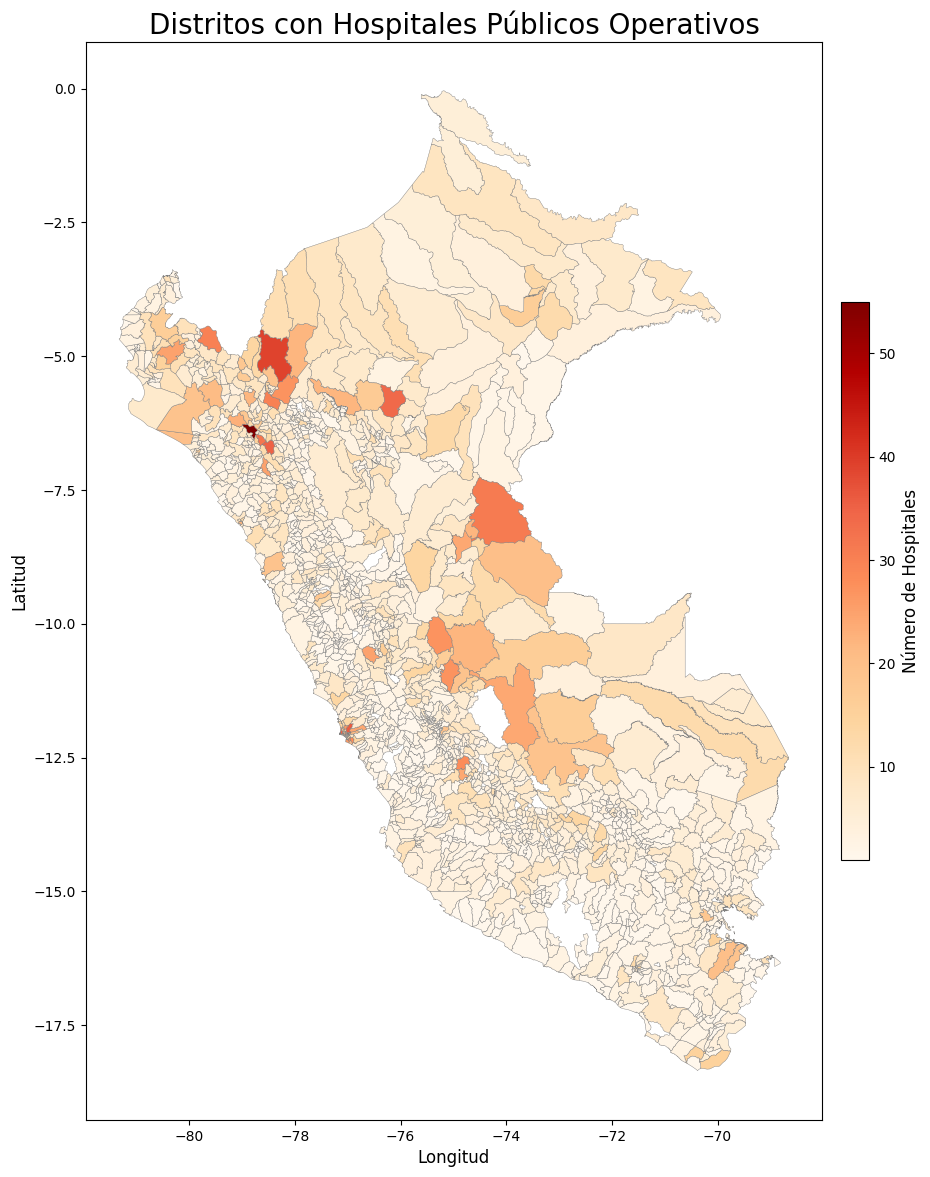

In [65]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

fig, ax = plt.subplots(figsize=(12, 14))

df.plot(
    column='CANTIDAD',
    cmap='OrRd',
    linewidth=0.3,
    edgecolor='gray',
    legend=False,
    ax=ax
)

ax.set_title('Distritos con Hospitales Públicos Operativos', fontsize=20)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# Crear barra de colores
norm = colors.Normalize(vmin=df['CANTIDAD'].min(), vmax=df['CANTIDAD'].max())
sm = cm.ScalarMappable(cmap='OrRd', norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, fraction=0.03, pad=0.02)
cbar.set_label("Número de Hospitales", fontsize=12)

plt.show()

In [81]:
print(df['CANTIDAD'].dtype)
print(df['CANTIDAD'].unique()[:20])  # muestra los primeros 20 valores únicos
print(df['CANTIDAD'].isna().sum())   # cuántos NaN hay
print((df['CANTIDAD'] == 0).sum())   # cuántos distritos tienen exactamente 0

float64
[ 3.  4.  2.  7. 14.  6.  9.  8. 24.  1.  5. 15. nan 10. 12. 18. 20. 13.
 19. 55.]
61
0


In [84]:
# Asegurar que CANTIDAD no tenga NaN
df['CANTIDAD'] = df['CANTIDAD'].fillna(0).astype(int)

# Filtrar geometrías válidas
df_valid = df[df.geometry.notnull() & df.is_valid].copy()

# Subconjunto: distritos sin hospitales
df_zero = df_valid[df_valid['CANTIDAD'] == 0].copy()

print("Distritos válidos:", len(df_valid))
print("Distritos sin hospitales:", len(df_zero))

Distritos válidos: 1873
Distritos sin hospitales: 61


C:\Users\santi\AppData\Local\Temp\ipykernel_39016\2320334314.py:10: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  ax.legend(loc='lower left')
C:\Users\santi\AppData\Local\Temp\ipykernel_39016\2320334314.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc='lower left')


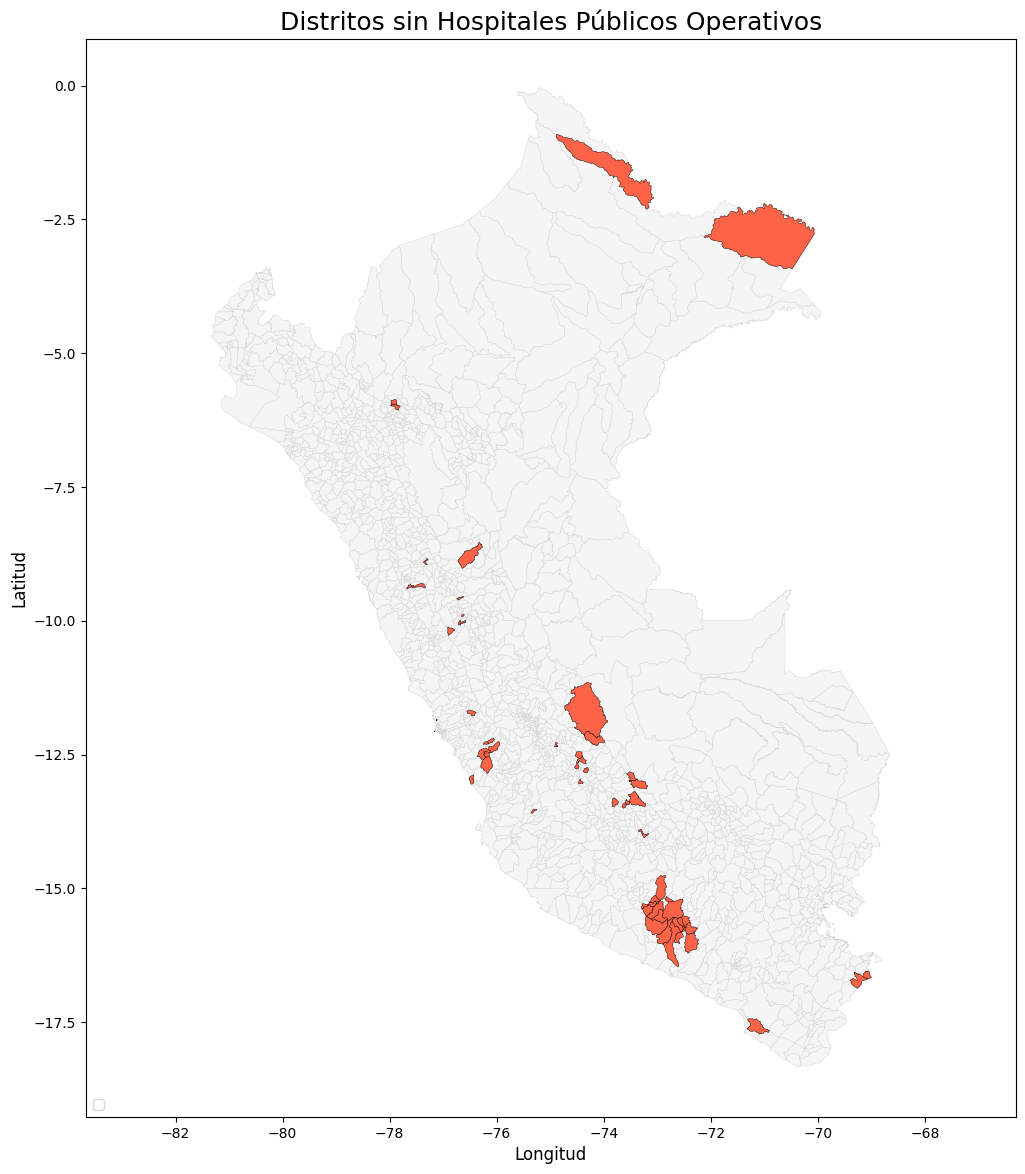

In [85]:
fig, ax = plt.subplots(figsize=(12, 14))

# Fondo gris claro
df_valid.plot(ax=ax, color='whitesmoke', edgecolor='lightgray', linewidth=0.3)

# Rojo para los distritos sin hospitales
if not df_zero.empty:
    df_zero.plot(ax=ax, color='tomato', edgecolor='black', linewidth=0.3, label='Sin hospitales')

ax.legend(loc='lower left')
ax.set_title("Distritos sin Hospitales Públicos Operativos", fontsize=18)
ax.set_xlabel("Longitud", fontsize=12)
ax.set_ylabel("Latitud", fontsize=12)

# 🚑 Forzar aspecto correcto sin depender de geopandas
ax.set_aspect('equal', adjustable='datalim')

plt.show()


# Parte 2

In [94]:
hosp_dep = data[
    (data['Institución'] != 'PRIVADO') &
    (data['Institución'] != 'OTRO') &
    (data['Condición'] == 'EN FUNCIONAMIENTO')
].copy()

In [95]:
count = hosp_dep.groupby('Departamento').size().reset_index(name='Total_Hospitales')

In [96]:
count = count.sort_values(by='Total_Hospitales', ascending=False).reset_index(drop=True)

In [97]:
print(count.head())

  Departamento  Total_Hospitales
0    CAJAMARCA               840
1         LIMA               751
2        JUNIN               487
3        PIURA               426
4       ANCASH               413


In [99]:
max_count  = count.iloc[0]
min_count = count.iloc[-1]
print([max_count, min_count])

[Departamento        CAJAMARCA
Total_Hospitales          840
Name: 0, dtype: object, Departamento        TUMBES
Total_Hospitales        51
Name: 24, dtype: object]


In [100]:
display(count)

,Departamento,Total_Hospitales
0,CAJAMARCA,840
1,LIMA,751
2,JUNIN,487
3,PIURA,426
4,ANCASH,413
5,PUNO,405
6,AMAZONAS,400
7,AYACUCHO,386
8,APURIMAC,374
9,SAN MARTIN,373


C:\Users\santi\AppData\Local\Temp\ipykernel_39016\3830308746.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


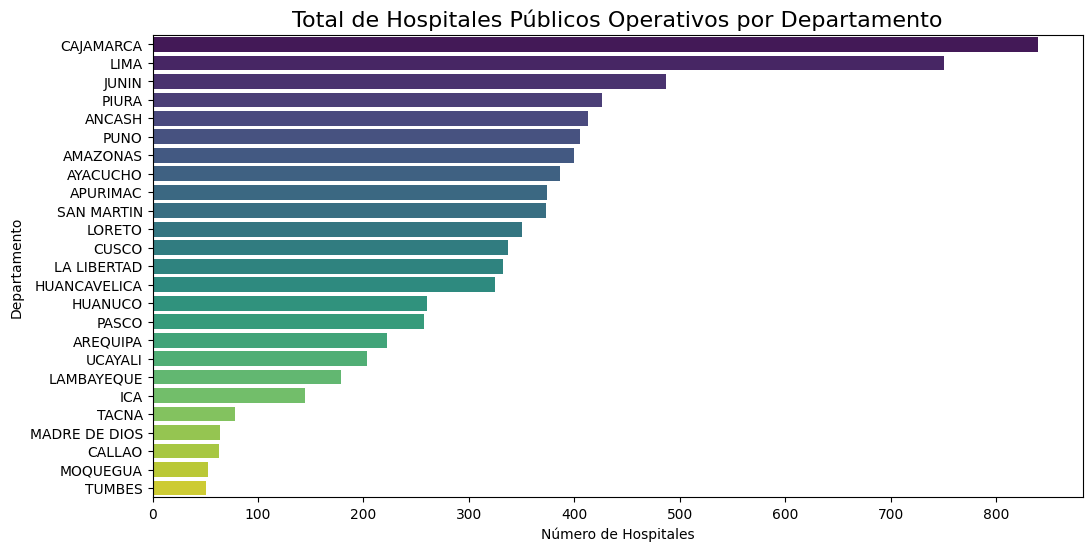

In [102]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=count,
    x='Total_Hospitales',
    y='Departamento',
    palette='viridis'
)
plt.title("Total de Hospitales Públicos Operativos por Departamento", fontsize=16)
plt.xlabel("Número de Hospitales")
plt.ylabel("Departamento")
plt.show()